In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import seaborn as sb


In [ ]:
eurusd_data = pd.read_csv('EURUSD_Candlestick_1_Hour.csv')
gbpusd_data = pd.read_csv('GBPUSD_Candlestick_1_Hour.csv')


eurusd_data['Local time'] = pd.to_datetime(eurusd_data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z')
gbpusd_data['Local time'] = pd.to_datetime(gbpusd_data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z')
merged_data = pd.merge(
    eurusd_data[['Local time', 'Close']].rename(columns={'Close': 'EURUSD'}),
    gbpusd_data[['Local time', 'Close']].rename(columns={'Close': 'GBPUSD'}),
    on='Local time'
)
merged_data



<ipython-input-2-a20f7d43ef74>:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  eurusd_data['Local time'] = pd.to_datetime(eurusd_data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z')
<ipython-input-2-a20f7d43ef74>:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  gbpusd_data['Local time'] = pd.to_datetime(gbpusd_data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z')


,Local time,EURUSD,GBPUSD
0,2024-01-01 00:00:00+01:00,1.10374,1.27292
1,2024-01-01 01:00:00+01:00,1.10374,1.27292
2,2024-01-01 02:00:00+01:00,1.10374,1.27292
3,2024-01-01 03:00:00+01:00,1.10374,1.27292
4,2024-01-01 04:00:00+01:00,1.10374,1.27292
...,...,...,...
8779,2024-12-31 19:00:00+01:00,1.03529,1.25102
8780,2024-12-31 20:00:00+01:00,1.03547,1.25094
8781,2024-12-31 21:00:00+01:00,1.03583,1.25193
8782,2024-12-31 22:00:00+01:00,1.03526,1.25107


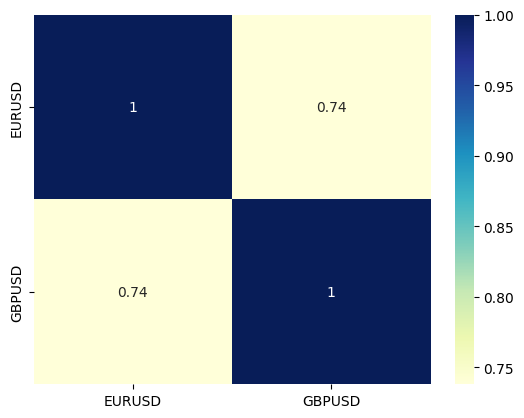

In [ ]:
dataplot = sb.heatmap(merged_data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

## Data Visualization


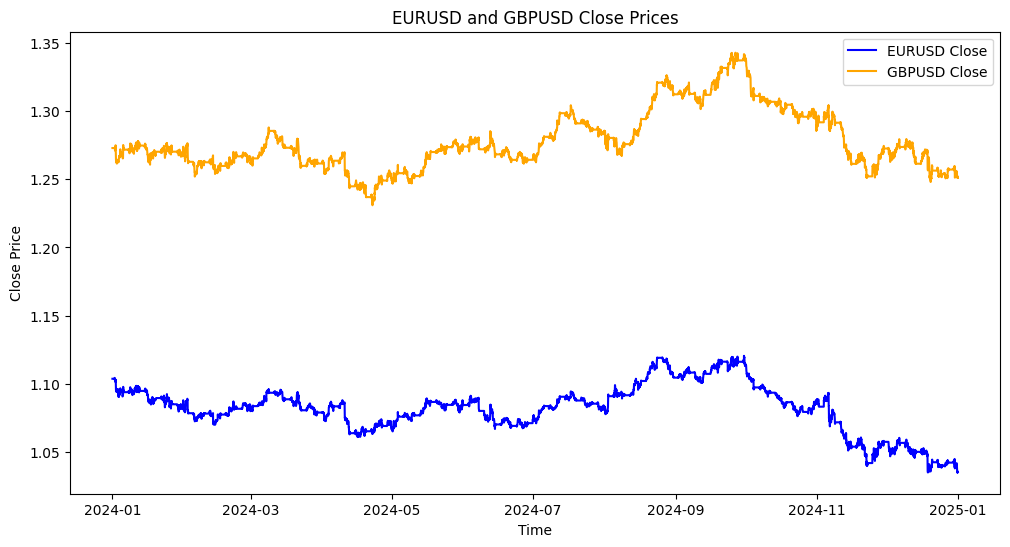

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Local time'], merged_data['EURUSD'], label='EURUSD Close', color='blue')
plt.plot(merged_data['Local time'], merged_data['GBPUSD'], label='GBPUSD Close', color='orange')
plt.title('EURUSD and GBPUSD Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

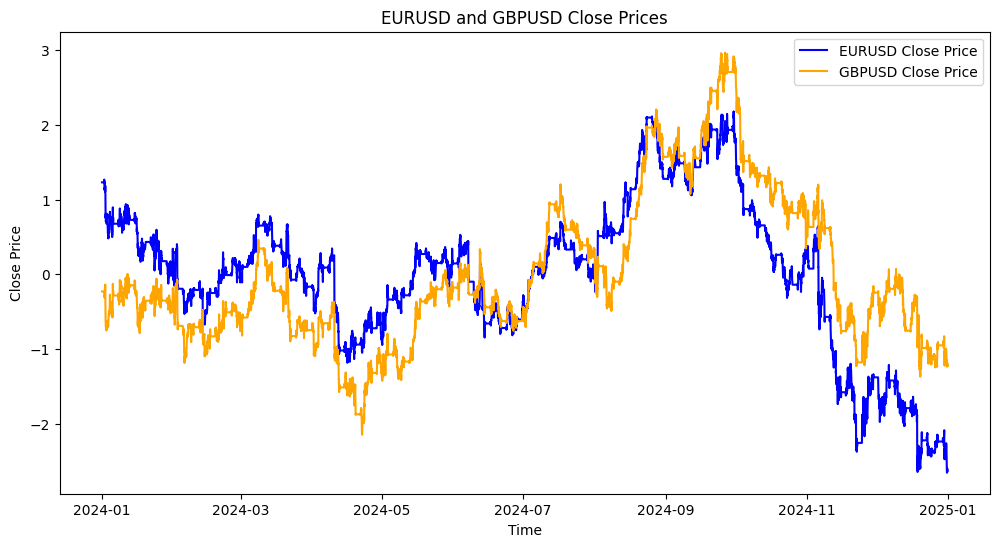

In [ ]:
from sklearn.preprocessing import StandardScaler # type: ignore


# Extract closing prices
eurusd_close = eurusd_data['Close']
gbpusd_close = gbpusd_data['Close']

# Standardize the price series
scaler = StandardScaler()
eurusd_standardized = scaler.fit_transform(eurusd_close.values.reshape(-1, 1))
gbpusd_standardized = scaler.fit_transform(gbpusd_close.values.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(merged_data['Local time'], eurusd_standardized, label='EURUSD Close Price', color='blue')
plt.plot(merged_data['Local time'], gbpusd_standardized, label='GBPUSD Close Price', color='orange')
plt.title('EURUSD and GBPUSD Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Cointegration test

In [ ]:
# Perform cointegration test between EURUSD and GBPUSD (using 'Close' prices)
score, pvalue, _ = coint(eurusd_data['Close'], gbpusd_data['Close'])
print("p-Value: ",pvalue)

p-Value:  0.8071466861456725


In [ ]:

if pvalue < 0.05:
    print("Series are co-integrated.")
else:
    print("Series are not co-integrated.")


Series are not co-integrated.


### Checking whether series are Cointegrated or not using ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller # type: ignore
# from statsmodels.regression.linear_model import OLS # type: ignore

X = sm.add_constant(merged_data['GBPUSD'])  # Add constant for regression
y = merged_data['EURUSD']
model = sm.OLS(y, X).fit()

# Extract residuals
merged_data['Residuals'] = model.resid

# Step 2: ADF test on residuals
adf_result = adfuller(merged_data['Residuals'])

In [ ]:
print("Regression Coefficients:")
print(model.params)
print("\nADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

Regression Coefficients:
const     0.317749
GBPUSD    0.597976
dtype: float64

ADF Test Statistic: -1.3707528742034203
p-value: 0.5962144965532324
Critical Values: {'1%': -3.431095012855981, '5%': -2.8618692463270787, '10%': -2.5669452528395973}


In [ ]:
merged_data

,Local time,EURUSD,GBPUSD,Residuals
0,2024-01-01 00:00:00+01:00,1.10374,1.27292,0.024816
1,2024-01-01 01:00:00+01:00,1.10374,1.27292,0.024816
2,2024-01-01 02:00:00+01:00,1.10374,1.27292,0.024816
3,2024-01-01 03:00:00+01:00,1.10374,1.27292,0.024816
4,2024-01-01 04:00:00+01:00,1.10374,1.27292,0.024816
...,...,...,...,...
8779,2024-12-31 19:00:00+01:00,1.03529,1.25102,-0.030539
8780,2024-12-31 20:00:00+01:00,1.03547,1.25094,-0.030311
8781,2024-12-31 21:00:00+01:00,1.03583,1.25193,-0.030543
8782,2024-12-31 22:00:00+01:00,1.03526,1.25107,-0.030599


In [ ]:
# Perform linear regression to calculate spread
X = sm.add_constant(gbpusd_data['Close'])
model = sm.OLS(eurusd_data['Close'], X).fit()
alpha, beta = model.params

# Calculate the spread
merged_data['Spread'] = merged_data['EURUSD'] - (alpha + beta * merged_data['GBPUSD'])


In [ ]:
# Define entry/exit logic based on spread
spread_mean = merged_data['Spread'].mean()
spread_std = merged_data['Spread'].std()

upper_threshold = spread_mean + 2.5 * spread_std
lower_threshold = spread_mean - 2.5 * spread_std

merged_data['Signal'] = 0
merged_data.loc[merged_data['Spread'] > upper_threshold, 'Signal'] = -1  # Short
merged_data.loc[merged_data['Spread'] < lower_threshold, 'Signal'] = 1   # Long
merged_data.loc[abs(merged_data['Spread'] - spread_mean) < 0.05 * spread_std, 'Signal'] = 0  # Exit


## Cumulative Strategy Returns

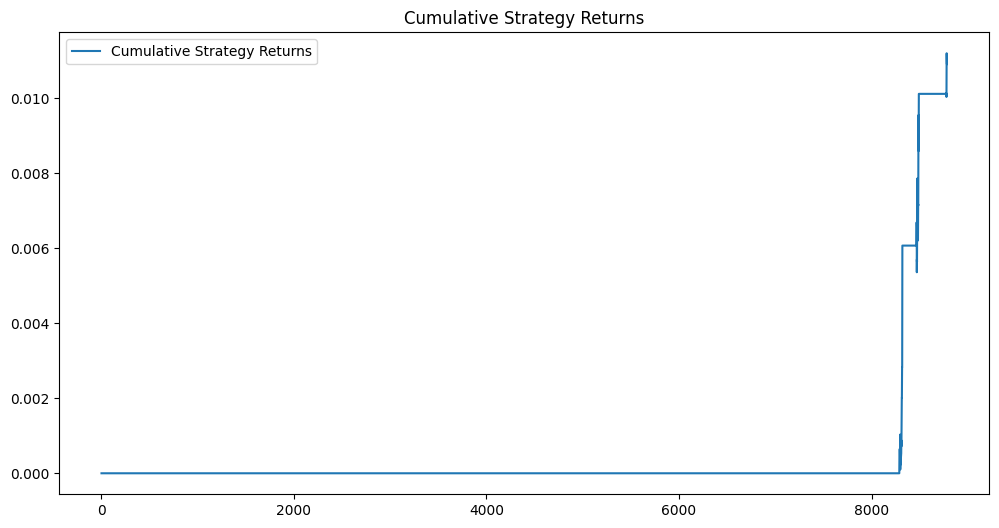

In [ ]:
# Calculate strategy returns
merged_data['Spread_Returns'] = merged_data['Spread'].diff()
merged_data['Strategy_Returns'] = merged_data['Signal'].shift(1) * merged_data['Spread_Returns']

# Visualize the strategy returns
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Strategy_Returns'].cumsum(), label="Cumulative Strategy Returns")
plt.title("Cumulative Strategy Returns")
plt.legend()
plt.show()


## Sharpe ratio

In [ ]:
# Calculate Sharpe ratio
merged_data['Strategy_Returns'] = merged_data['Strategy_Returns'].fillna(0)
mean_returns = merged_data['Strategy_Returns'].mean()
std_returns = merged_data['Strategy_Returns'].std()
sharpe_ratio = mean_returns / std_returns * np.sqrt(252)  # Annualized Sharpe ratio
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.34797467737399074
